Reference

[1] 李航,《统计学习方法》

[2] Dave Krebs, Introduction to Kernel Methods


# 核方法 kernel method

核方法的核心思想是核技巧(kernel trick，核方法正是因这一核心思想而得名)。

其基本思想是：要想在新的表示空间中找到良好的决策超平面，你不需要在新空间中直接计算出点的坐标，只需要在新空间中计算出点对之间的距离，而利用核函数(kernel function)可以高效地完成这种计算。核函数是一个在计算上能够实现的操作，将原始空间中的任意两点映射为这两点在目标表示空间中的距离，完全避免了对新表示进行直接计算。

## Motivation for Kernel method

问题的起源在于如何对非线性可分的数据进行分类处理。
如果输入数据是线性可分的，机器学习领域有很多算法可以用于检测数据之间的线性关系(either in linear classification or linera regression)，比如说：

(1) Ridge Regression

(2) Support Vector Machines (SVM’s)

(3) Principal Component Analysis (PCA)

但是当原始数据之间不是线性关系或者说不是线性可分的那怎么办呢？

一种思路是，将数据映射到一个（可能是高维的）向量空间（称为特征空间，feature space），使得在高维空间中数据之间呈现出线性关系，如下图所示：
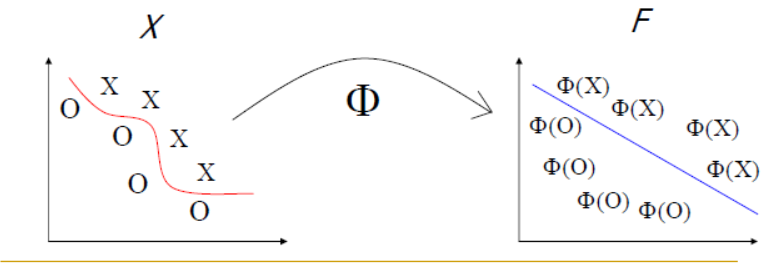

但是，以上这个思路如果直接实现的话有个问题，那就是在高维空间直接进行数据表示以及处理通常需要其运算负荷难以承受（或者说运算效率低下）。一个替代性的方案是，(1) 不直接针对高维的特征空间(feature space)中的数据坐标进行处理，而只是计算特征空间中数据样点之间的相似度度量(similarity measure)或者说‘距离’度量；(2) 然后，采用只需要相似度度量（而不需要数据样点坐标本身）作为输入的算法进行处理。

通常可以采用点积(dot product, a special form of inner product)作为相似度度量。

## 核函数定义

核函数是指以原始向量空间的向量为输入，（不做原空间到特征空间的映射处理）直接计算它们在特征空间中的点积的函数。

更正式的定义是：

令$\bf x, \bf y \in X$，并定义一个特征映射(feature map)，$\phi: X \rightarrow  R^N$，则下式定义了一个核函数：
$$k(\bf x, \bf y) = \langle {\phi(\bf x)}, {\phi(\bf y)} \rangle$$

核方法的要点在于：我们不需要将数据向量显式(explicitly)地从原空间映射到特征空间中去，有很多算法只需要像向量(映射到特征空间后的image vectors)之间的内积即可！因此根本就不需要特征空间中的向量坐标。



## 核函数例子

考虑一个2维的输入空间$X \subset \mathbb R^2$,以及特征映射：$$\phi(\bf x) = \phi((x_1,x_2)) = (x_1^2,x_2^2,\sqrt{2}x_1 x_2)\in F \subset  R^3$$
由此可以得到：
$$\langle {\phi(\bf x)}, {\phi(\bf y)} \rangle \\= \langle (x_1^2,x_2^2,\sqrt{2}x_1 x_2), (y_1^2,y_2^2,\sqrt{2}y_1 y_2) \rangle \\= x_1^2y_1^2 + x_2^2y_2^2 + 2x_1y_1x_2y_2 \\= (x_1y_1+x_2y_2)^2 \\= \langle \bf x, \bf y \rangle^2$$

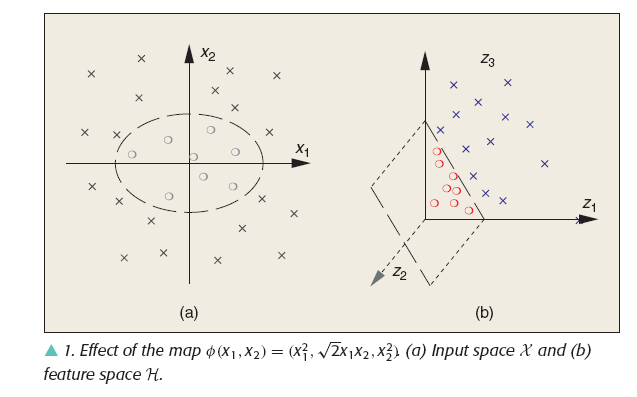

由此得到一个核函数：$$k(\bf x, \bf y) = \langle \bf x, \bf y \rangle^2$$

但是基于另外一个特征映射$$\psi(\bf x) = (x_1^2,x_2^2,x_1x_2,x_2x_1) \in F \subset R^4$$也能得到同样的核函数，也就是说想要得到某个特定的核函数来说，可能的特征映射并不是唯一的。

偏差-方差困境是机器学习方法的面临的主要问题。如果模型过于简单则模型将难以找到输入和输出之间的适当关系（欠拟合）。如果一个模型太复杂，它在训练中会表现得更好，但在看不见的数据上的性能会有更大的差异（或过拟合），而且复杂的模型往往需要更昂贵的计算资源。对于机器学习来说理想的方法是，能够找到一个简单的模型，它训练起来既很快又可以找到输入和输出之间的复杂关系。核方法就是通过将数据的输入空间映射到高维特征空间，在高维特征空间中可以训练简单的线性模型，从而得到高效、低偏差、低方差的模型。

这句话就是本文的写作目的。在看完本文后，希望你能很好地理解这句话的含义以及它为什么重要。

核方法

机器学习世界中有许多的核方法。支持向量机(svm)就是其中之一，在20世纪后期甚至优于当时的神经网络。但是现在因为数据的数量有了突飞猛进的发展，所以核方法并不占优势。因为核方法最适合于中小型数据集，但是在结果的可解释性很重要的问题上核方法还是有优势的。

核方法使用核(或基函数)将输入数据映射到不同的空间。通过这种映射，简单的模型可以在新的特征空间而不是输入空间上训练，从而提高模型的性能。

以上是对核函数的介绍，在本篇文章中将重点介绍径向基函数，这是一个非常简单但常见的核。



线性回归和 RBF（径向基函数）

在回归问题中，我们试图估计从 X 推断 Y 的最佳函数。如果 X 和 Y 之间存在非线性关系，则不能简单地在此数据上拟合线性模型。然而，核方法的目标是在这些非线性关系上使用线性模型并保证结果的是正确的。

内核方法通过将数据转换为更高维度并在此维度上拟合线性模型来实现这一点。通过这种方法我们在原始输入空间中有效地拟合了一个高阶模型。

线性回归

我们先看一下线性回归，然后我们就可以了解如何使用核方法对线性模型生成非线性映射。$$E = ||y-Xw||$$

最优线性回归是最小化我们模型的预测和目标输出y之间的平方距离的回归器。将这个误差最小化就能得到最优解决方案。
$$\frac{\partial{E}}{\partial w}=2X^T(y-Xw)=0$$
$$X^TXw = X^Ty \\ w = (X^T X)^{-1}X^T y$$

我们可以将最小二乘误差与我们模型的权重进行微分，从而找到产生最小误差的权重向量，结果就是伪逆解。为了正确理解线性代数公式，我们必须熟悉每个变量的维度数.

输入数据 X 是 (N,d) 维，其中 N 是数据点的数量，d 是特征的数量。因此，逆计算将是一个 (d,d) 矩阵，并且所得的权重矩阵是 (d,1)。我们的权重向量与输入数据中的特征具有相同的维度。这是肯定的，因为当我们从 X 推断 Y 时，我们采用权重和输入数据之间的点积，因此输入必须具有与我们的权重相同的维度。

高维空间中的线性回归

核方法通过使用核或一组 M 个基函数将数据矩阵 X 映射到新的设计矩阵 U（design matrix）。新的设计矩阵具有更高的维度（NxM，其中 M ≥ d）。
$$u_{ij} = \phi(\frac{||x_i-m_j||}{\sigma})$$


我们可以通过采用 M 个基函数 (ϕ) 来构造一个设计矩阵 U，每个基函数都由它们自己的均值和标准差参数化。上面等式中的平均值的维数为 (dx1)。因此，对于输入空间中的每个数据点，我们应用 M 个基函数将输入维度 (Nxd) 转换为新的设计矩阵 (NxM)。

RBF 使用高斯基函数。每个基函数代表输入空间中的高斯分布。每个数据点都在所有高斯分布中进行评估。结果是输入向量从 d 维到 M 维的映射。

要参数化这些高斯分布的均值和标准差，可以使用k-means聚类得到参数化基函数的均值和标准差

现在我们有了我们的设计矩阵 U，并且我们已经将输入数据映射到了一个高维空间，我们可以在这个新的特征空间中拟合一个线性模型。
$$l = (U^T U)^{-1}U^T y$$


通过来自特征空间的估计和我们的目标$y$之间的最小二乘误差，并根据我们的新权重向量 $l$ 进行微分，我们发现最优解与输入数据中线性回归的最优解相同 .

这里要注意的是我们的权重向量 ($l$) 现在是一个 (M,1) 向量，在原始输入空间中，权重向量是一个 (d,1) 向量（记住 M > d）。

合成数据的例子

这是合成的非线性数据。有 10,000 个数据点，我们的 Y 坐标是一维的。这意味着我的数据矩阵 X 的维度为 (10,000x1)。我们可以尝试通过使用上面看到的伪逆解计算最佳权重来拟合该数据的线性模型。正如您在上面看到的那样，它的表现并不好。

下面我们通过在高维特征空间中拟合相同的线性模型，更好地近似数据中的真实关系。

首先，我将 200 个基函数应用于我的每个数据点。我在我的输入空间中采用 200 个高斯分布，并评估我所有基本函数的每个数据点。我的新设计矩阵现在是 (10,000x200) 维的。然后我使用相同的伪逆解来获得这个新特征空间中的最佳权重。

RBF模型估计的关系是非线性的，并且与数据吻合得很好。但是这个新模型仍然是一个线性回归器!因为我们将它拟合到新特征空间中，所以我们间接地在原始输入空间中拟合了一个复杂的非线性模型。

总结

核方法使用核(或一组基函数)将低维输入空间映射到高维特征空间。并在新的特征空间中训练一个线性模型(ax +b类型的线性模型)。我们实际上是在原始输入空间中训练一个高阶模型(例如ax²+bx +c类型)。通过这样做，既保留了简单模型的所有优势(如训练速度、具有解析解、方差更低)，也获得了更复杂模型的优势(更好的映射、更低的偏差)。这就是内核方法如此强大的原因!

# Radial Basis Function Kernel

Radial Basis Function Kernel: 径向基函数核，简称为RBF核，或者高斯核(Gaussian Kernel)，顾名思义，就是采用径向基函数（更具体一点说就是高斯函数）形式的核，它的定义如下所示：
$$K_{RBF}(\bf{x}, \bf{x'}) = exp[-\gamma||\bf{x} - \bf{x'}||^2]  = exp[-\frac{||\bf{x} - \bf{x'}||^2}{2\sigma^2}]$$
这个恰好是标准正态分布的概率密度函数的形式，其中$\gamma = \frac{1}{2\sigma^2}$用于控制高斯函数的扩展宽度.

## RBF Kernel用于映射到无限维空间

考虑到一个核是指任何以下形式的函数：$$K(\bf{x}, \bf{x'}) = <\psi(\bf{x}), \psi(\bf{x'})>$$
其中$\psi$的作用是将从向量$\bf{x}$和$\bf{x'}$所在的原向量空间映射到一个新的向量空间。而核函数则代表两个向量映射到新的向量空间后的内积(inner product).

以下我们将证明，RBF的$\psi$函数将向量映射到了一个无限维空间，即：$\psi_{RBF} : \mathbb R^n \rightarrow \mathbb R^{\infty}$。对于欧几里得向量，这个新的无限维空间是一个无限维欧几里得空间。

[注1]无限维(向量)空间是相对于有限维(向量)空间而言，简单地说，就是它基向量集合包含无限个基向量。

[注2]欧几里得向量是指欧几里得向量空间中的向量，而欧几里得空间是指其中的距离度量是定义为欧几里得距离的。



不失一般性，令$\gamma = \frac{1}{2}$(correponding to $\sigma^2 = 1$).

$$K_{RBF}(\bf{x}, \bf{x'}) = exp[-\frac{1}{2}||\bf{x} - \bf{x'}||^2] \\ = exp[-\frac{1}{2}<\bf{x} - \bf{x'},\bf{x} - \bf{x'}>] \\ = exp[-\frac{1}{2}(<\bf{x},\bf{x}> - <\bf{x'},\bf{x}> - <\bf{x},\bf{x'}> + <\bf{x'},\bf{x'}>)] \\ = exp[-\frac{1}{2}(||\bf{x}||^2 + ||\bf{x'}||^2 - 2<\bf{x},\bf{x'}>)]\\ = exp[-\frac{1}{2}(||\bf{x}||^2 + ||\bf{x'}||^2)]exp[<\bf{x},\bf{x'}>] \\= C \cdot e^{<\bf{x},\bf{x'}>}$$

其中，$C = exp[-\frac{1}{2}(||\bf{x}||^2 + ||\bf{x'}||^2)]$是一个常数。

进一步进行指数函数的泰勒级数展开可以得到：
$$K_{RBF}(\bf{x}, \bf{x'}) = C \cdot e^{<\bf{x},\bf{x'}>} \\= C \sum\limits_{k=0}\limits^{\infty}\frac{<\bf x, \bf x'>^k}{k!} \\= C \cdot \sum\limits_{k=0}\limits^{\infty}\frac{K_{poly(k)}(\bf x, \bf x')}{k!}$$

由此可以看出，RBF核可以通过对多项式核进行无限求和而得。

正如之前所证明的，$$K_c(\bf x, \bf x') := K_a(\bf x, \bf x') + K_b(\bf x, \bf x')$$
意味着，$\psi_c$函数必需取如下向量形式：$$\psi_c(\bf x) := (\psi_a(\bf x),\psi_b(\bf x))$$
基于此，$\psi_c$的向量空间的内积定义为：$$<\psi_c(\bf x),\psi_c(\bf x')> := <\psi_a(\bf x),\psi_a(\bf x')> + <\psi_b(\bf x),\psi_b(\bf x')>$$

对于欧几里得向量空间，这意味着，$\psi_c(\bf x)$是一个由$\psi_a(\bf x)$和$\psi_b(\bf x)$串接而成的向量，即
$$<\psi_c(\bf x),\psi_c(\bf x')> := \sum\limits_{i}\limits^{dimension(a)}\psi_{a,i}(\bf x)\psi_{a,i}(\bf x') + \sum\limits_{j}\limits^{dimension(b)}\psi_{b,j}(\bf x)\psi_{b,j}(\bf x') \\= \sum\limits_{i}\limits^{dimension(a)+dimension(b)}\psi_{c,i}(\bf x)\psi_{c,i}(\bf x')$$
由于RBF是如此串接而成的向量的无限和，我们可以认为所映射到的空间是一个无限维向量空间。

The 
 parameter
Recall a kernel expresses a measure of similarity between vectors. The RBF kernel represents
this similarity as a decaying function of the distance between the vectors (i.e.
the squared-norm of their distance). That is, if the two vectors are close together then,
kx 􀀀 x0k will be small. Then, so long as 
 > 0, it follows that 􀀀
 kx 􀀀 x0k2 will be larger.
Thus, closer vectors have a larger RBF kernel value than farther vectors. This function
is of the form of a bell-shaped curve.
The 
 parameter sets the width of the bell-shaped curve. The larger the value of 

the narrower will be the bell. Small values of 
 yield wide bells. This is illustrated in
Figure 1.3

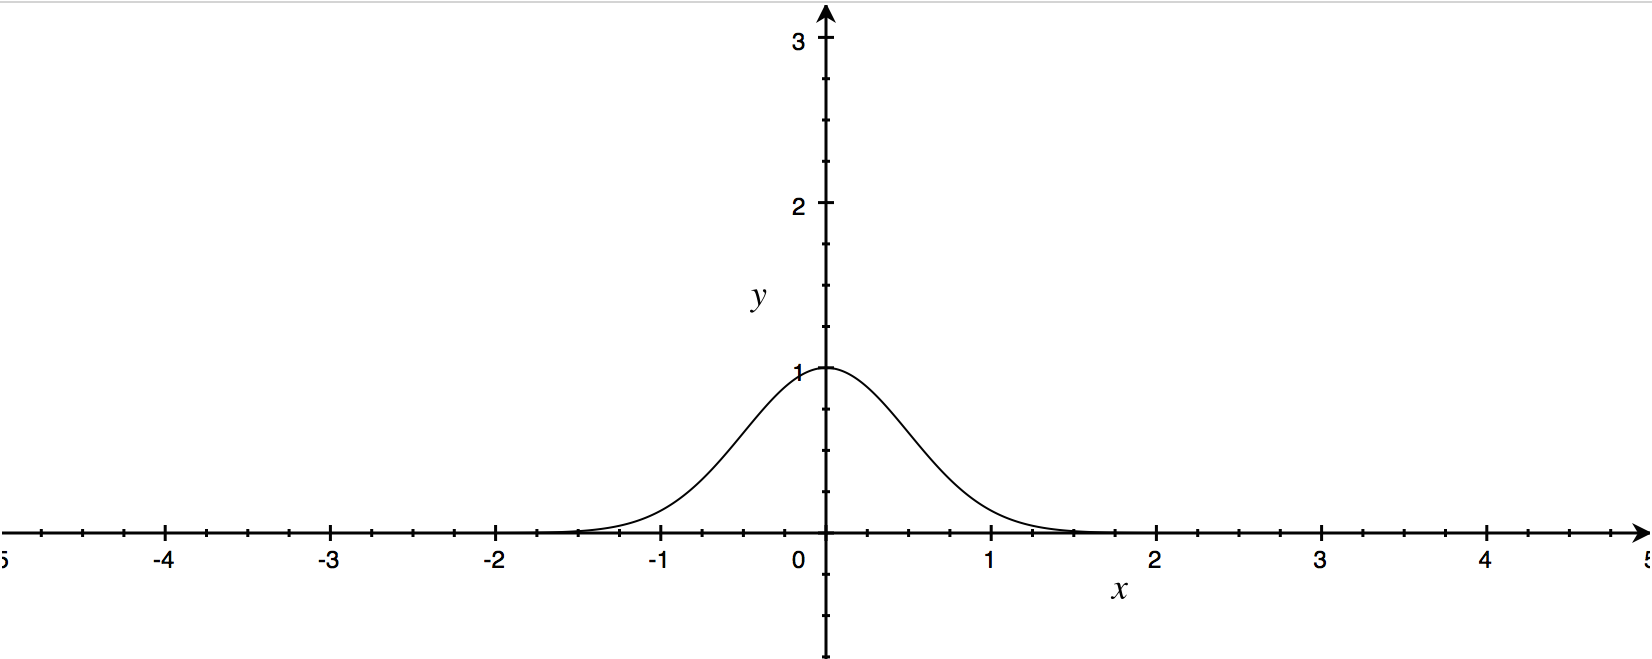

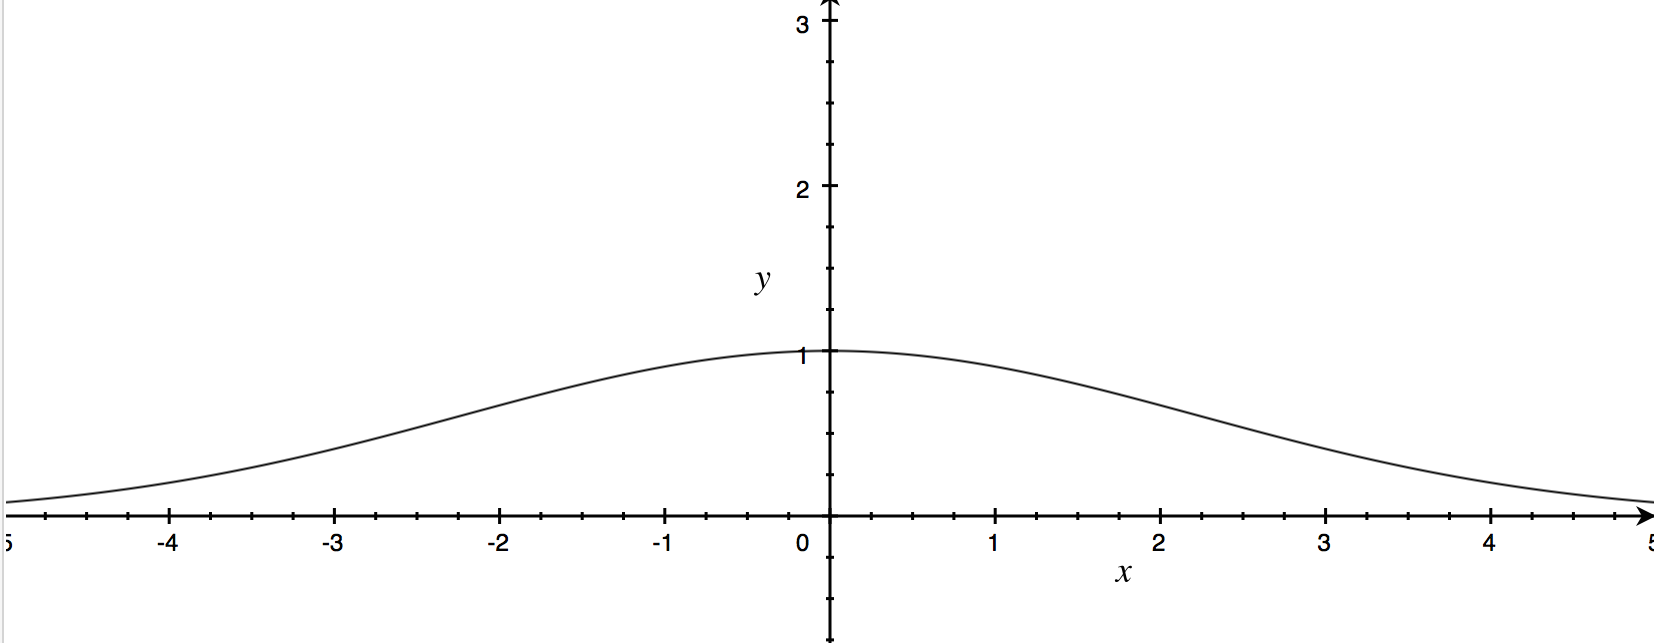